Use Lasso to Reduce Dimension

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('../../data/combined_data/merged_052423.csv')

In [3]:
print(df.head())
print("Shape of the Dataset: {}".format(df.shape))

  country  sect     t source      outp     outpd    outptt      gvco  \
0     ABW     1  1990   eora  3.889417  1.009440  1.632360  1.247617   
1     ABW     1  1991   eora  4.737275  1.451135  1.938848  1.347292   
2     ABW     1  1992   eora  4.550254  1.134122  1.875140  1.540992   
3     ABW     1  1993   eora  5.093862  1.536173  2.006202  1.551487   
4     ABW     1  1994   eora  6.775789  2.075407  2.444015  2.256366   

     gvcobp    gvcofp  ...  opec  oilreserves_full  oilreserves  \
0  0.284422  0.037627  ...   0.0               NaN          NaN   
1  0.322020  0.069577  ...   0.0               NaN          NaN   
2  0.329202  0.038029  ...   0.0               NaN          NaN   
3  0.295577  0.065685  ...   0.0               NaN          NaN   
4  0.318675  0.236208  ...   0.0               NaN          NaN   

   oilreserves_public  milexp_pergdpSIPRI_diff  logpop_M_diff  \
0                 NaN                      NaN            NaN   
1                 NaN             

In [7]:
def clean_data(df, feature_columns, target_columns):
    df_clean = df[feature_columns + target_columns]
    df_clean = df_clean.dropna()
    return df_clean

def get_features_targets(df_clean, feature_columns, target_name):
    x = df_clean[feature_columns].values
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x)
    y = df_clean[target_name].values
    return x, y

def split_data(x, y, test_size=0.20, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state, stratify=y)
    return X_train, X_test, y_train, y_test

def perform_grid_search(x, y, params, cv_splits=5, random_state=42):
    kf = KFold(n_splits=cv_splits, shuffle=True, random_state=random_state)
    lasso = Lasso()
    lasso_cv = GridSearchCV(lasso, param_grid=params, cv=kf)
    lasso_cv.fit(x, y)
    return lasso_cv.best_params_

def get_column_names(df, feature_columns):
    return df[feature_columns].columns

def fit_model(X_train, y_train, best_alpha):
    lasso = Lasso(alpha=best_alpha)
    lasso.fit(X_train, y_train)
    return lasso

def plot_feature_importance(names, coefficients):
    plt.bar(names, np.abs(coefficients))
    plt.xticks(rotation=90)
    plt.grid()
    plt.title("Feature Selection Based on Lasso")
    plt.xlabel("Features")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Importance")
    plt.show()

feature_columns = ['oilreserves', 'decade','religion_fractionalization',
                    'logpopdens_diff', 'logoutreg_diff', 'ecgrowth_demeaned', 'democracy_diff',
                   'logmountain', 'ethnic_fractionalization',
                   'leg_british']
target_columns = ['onset2COWCS']
#  'oilreserves_full', 'oilreserves_public','language_fractionalization', 'opec''logpop_M_diff'

df_clean = clean_data(df, feature_columns, target_columns)

target_name = 'onset2COWCS' 

x, y_bp = get_features_targets(df_clean, feature_columns, target_name)

X_train, X_test, y_train, y_test = split_data(x, y_bp)

params = {"alpha": np.arange(0.00001, 10, 0.1)}

best_params = perform_grid_search(x, y_bp, params)
print("Best Params:", best_params)

names = get_column_names(df, feature_columns)

lasso_model = fit_model(X_train, y_train, best_params['alpha'])




Best Params: {'alpha': 1e-05}



Analyzing target: onset2COWCS
Best Params: {'alpha': 1e-05}
Feature importances:
oilreserves: 0.018475644904773457
decade: -0.012137298820178583
religion_fractionalization: 0.00586480057391885
logpopdens_diff: -0.0328956222792468
logoutreg_diff: 0.0037478327419927827
ecgrowth_demeaned: -0.16611270948060836
democracy_diff: -0.09926489213789058
logmountain: 0.025763834292582357
ethnic_fractionalization: 0.019472807336764732
leg_british: 0.0034189814122739803


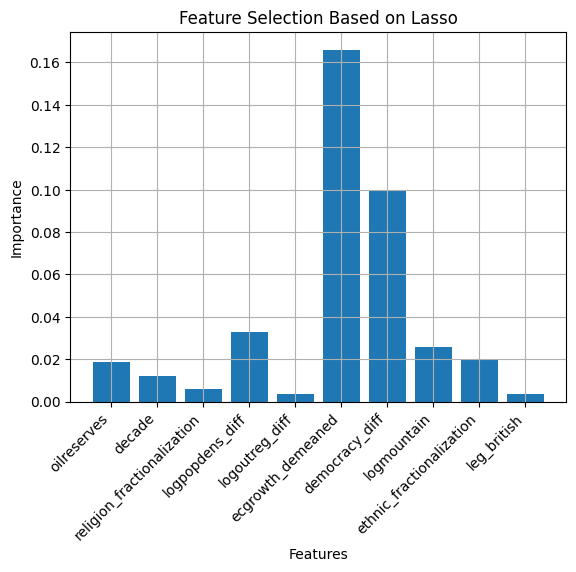

In [8]:
from sklearn.preprocessing import MinMaxScaler

def print_feature_importance(names, coefficients):
    for name, coef in zip(names, coefficients):
        print(f"{name}: {coef}")

for target_name in target_columns:
    print(f"\nAnalyzing target: {target_name}")

    x, y = get_features_targets(df_clean, feature_columns, target_name)

    X_train, X_test, y_train, y_test = split_data(x, y)

    best_params = perform_grid_search(x, y, params)
    print("Best Params:", best_params)

    lasso_model = fit_model(X_train, y_train, best_params['alpha'])

    print("Feature importances:")
    print_feature_importance(names, lasso_model.coef_)
    plot_feature_importance(names, lasso_model.coef_)

In [6]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = lasso_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

R-squared: 0.014839777387302688
RMSE: 0.13631234168095058
